In [34]:
import pandas as pd

war_df = pd.read_csv('../data/final/132-war-days-zip.csv',
                     compression={'method': 'gzip', 'compresslevel': 1, 'mtime': 1},
                     index_col=[0])

In [ ]:
war_df.head()

In [394]:
war_df["Publisher"].value_counts()

ΝΑΥΤΕΜΠΟΡΙΚΗ               4628
ΚΑΘΗΜΕΡΙΝΗ                 3230
THE GUARDIAN               3205
ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ    2400
Name: Publisher, dtype: int64

In [12]:
ram = war_df.memory_usage(deep=True).sum()
print(ram)

174556111


In [35]:
import prototypes.datamodel as model
from pandas.api.types import CategoricalDtype

publisher_enum = CategoricalDtype(
    categories=[model.Publishers.KATHIMERINI.value,
                model.Publishers.EFSYN.value,
                model.Publishers.NAFTEMPORIKI.value,
                model.Publishers.THE_GUARDIAN.value],
    ordered=True)

lang_enum = CategoricalDtype(
    categories=[model.Lang.GREEK.value,
                model.Lang.ENGLISH.value],
    ordered=True)

sentiments_enum = CategoricalDtype(
    categories=[model.Sentiments.NEGATIVE.value,
                model.Sentiments.POSITIVE.value,
                model.Sentiments.NEUTRAL.value],
    ordered=True)

## Casting & df Optimization
`REDUCE MEMORY USAGE`

In [36]:
war_df['Publisher'] = war_df['Publisher'].astype(publisher_enum)
war_df['Date Formatted'] = pd.to_datetime(war_df['Date Formatted'], format="%Y-%m-%d")
war_df['Lang'] = war_df['Lang'].astype(lang_enum)
war_df['Tag'] = war_df['Tag'].astype('category')
war_df['Text'] = war_df['Text'].fillna('').astype('string')
war_df['Comments count'] = war_df['Comments count'].astype('int32')
war_df['Comments api key'] = war_df['Comments api key'].fillna('').astype('string')
war_df['Article url'] = war_df['Comments api key'].astype('string')
war_df['Heading'] = war_df['Heading'].astype('string')
war_df['Year'] = war_df['Year'].astype('int16')
war_df['Month'] = war_df['Month'].astype('int8')
war_df['Day'] = war_df['Day'].astype('int8')
war_df['Lemma'] = war_df['Lemma'].fillna('').astype('string')
war_df['Sentiments'] = war_df['Sentiments'].astype(sentiments_enum)
war_df.dtypes

Publisher                 category
Date Formatted      datetime64[ns]
Lang                      category
Heading                     string
Tag                       category
Text                        string
Comments exist                bool
Comments count               int32
Comments api key            string
Article url                 string
Chars                        int64
Words                        int64
Year                         int16
Month                         int8
Day                           int8
Lemma                       string
Lemma_unique                 int64
Sentiments                category
Positivity                 float64
Negativity                 float64
dtype: object

In [15]:
ram_new = war_df.memory_usage(deep=True).sum()
print(ram_new)

168152401


## Data Visualization

In [17]:
war_df['Sentiments'].value_counts()

negative    7264
positive    5619
neutral      580
Name: Sentiments, dtype: int64

In [34]:
war_df[war_df['Lang'] == 'en']['Date Formatted']

10531   2022-02-23
10532   2022-02-23
10533   2022-02-23
10534   2022-02-23
10535   2022-02-23
           ...    
13731   2022-07-02
13732   2022-07-03
13733   2022-07-03
13734   2022-07-03
13735   2022-07-03
Name: Date Formatted, Length: 3205, dtype: datetime64[ns]

In [19]:
war_df.head()

,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Lemma,Sentiments,Positivity,Negativity
0,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Μπορέλ: O Πούτιν πρέπει να επιλέξει «ανάμεσα σ...,ΚΟΣΜΟΣ,"Οι κυρώσεις, που έχουν επιβληθεί στην Ρωσία σε...",False,0,,,4114,627,2022,7,5,κύρωση επιβάλλω Ρωσία σχέση εισβολή ουκρανία α...,negative,0.037,0.040
1,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Μαριούπολη: Οι φιλορώσοι αυτονομιστές κατέσχεσ...,ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ,Οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...,False,0,,,2548,360,2022,7,5,φιλορώσος αυτονομιστής κατέλαβαν δύο πλοίο ξέν...,positive,0.026,0.022
2,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Πρόβλεψη για αύξηση του εμπορίου μεταξύ Ρωσίας...,ΔΙΕΘΝΗΣ ΟΙΚΟΝΟΜΙΑ,Ο εμπορικός τζίρος μεταξύ Τουρκίας και Ρωσίας ...,False,0,,,1848,274,2022,7,5,εμπορικός τζίρος τουρκία ρωσίας ενδέχεται αυξά...,positive,0.021,0.018
3,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Σακελλαροπούλου σε Ζελένσκι: Είμαστε και θα εί...,ΠΟΛΙΤΙΚΗ,«Το απαραβίαστο των συνόρων είναι η βάση της σ...,False,0,,,2472,371,2022,7,5,απαραβίαστο συνόρων βάση συμβίωση 1945 δύναμη ...,positive,0.035,0.031
4,ΚΑΘΗΜΕΡΙΝΗ,2022-07-05,el,Ουκρανία: Το ρωσοκρατούμενο πυρηνικό εργοστάσι...,ΚΟΣΜΟΣ,"Ο μεγαλύτερος πυρηνικός σταθμός της Ευρώπης, μ...",False,0,,,2829,418,2022,7,5,μεγαλύτερος πυρηνικός σταθμός ευρώπη έδρα ημικ...,positive,0.028,0.016


In [36]:
war_df['Date Formatted'].max()

Timestamp('2022-07-06 00:00:00')

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

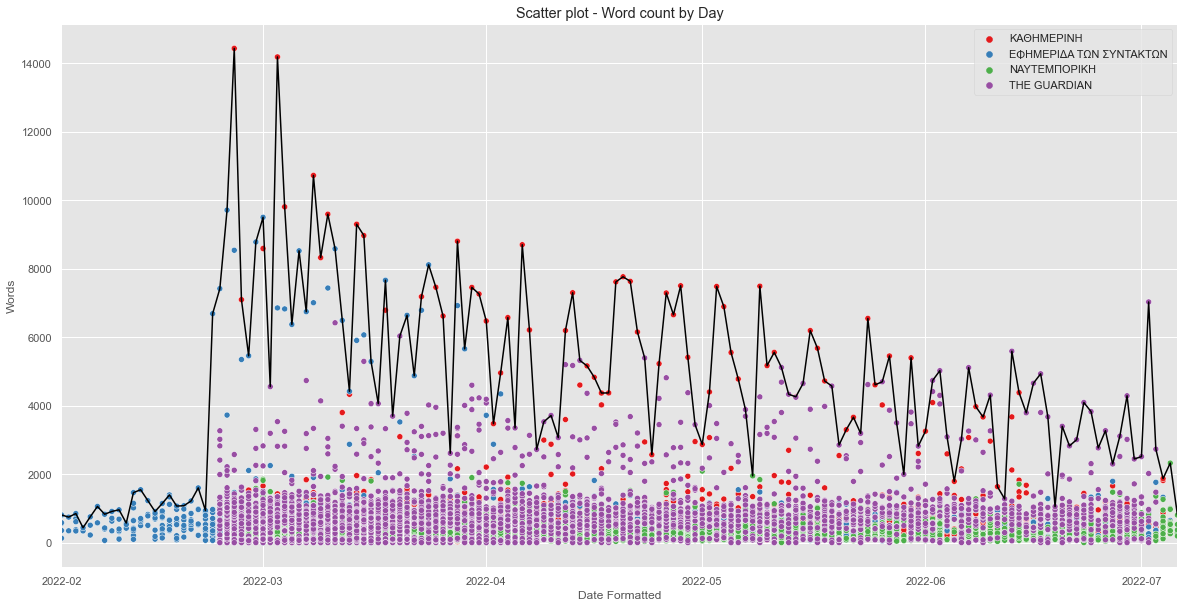

In [357]:
import datetime

fig = plt.figure(figsize=(20, 10))
ax = sns.scatterplot(x='Date Formatted',
                     y='Words',
                     hue='Publisher',
                     legend='full',
                     data=war_df,
                     palette=sns.color_palette("Set1", n_colors=4))
max_transistors_per_year = war_df.groupby('Date Formatted')['Words'].max()
sns.lineplot(data=max_transistors_per_year,
             ax=ax.axes,
             color='black')
ax.set_xlim(datetime.date(2022, 2, 1), war_df['Date Formatted'].max())
ax.set(title= 'Scatter plot - Word count by Day')
plt.show()

In [52]:
from matplotlib.pyplot import savefig

fig.savefig('../reports/1-words-date-trans.png',
            format='png',
            dpi=300,
            bbox_inches='tight',
            transparent=True,
            pad_inches=0.5)

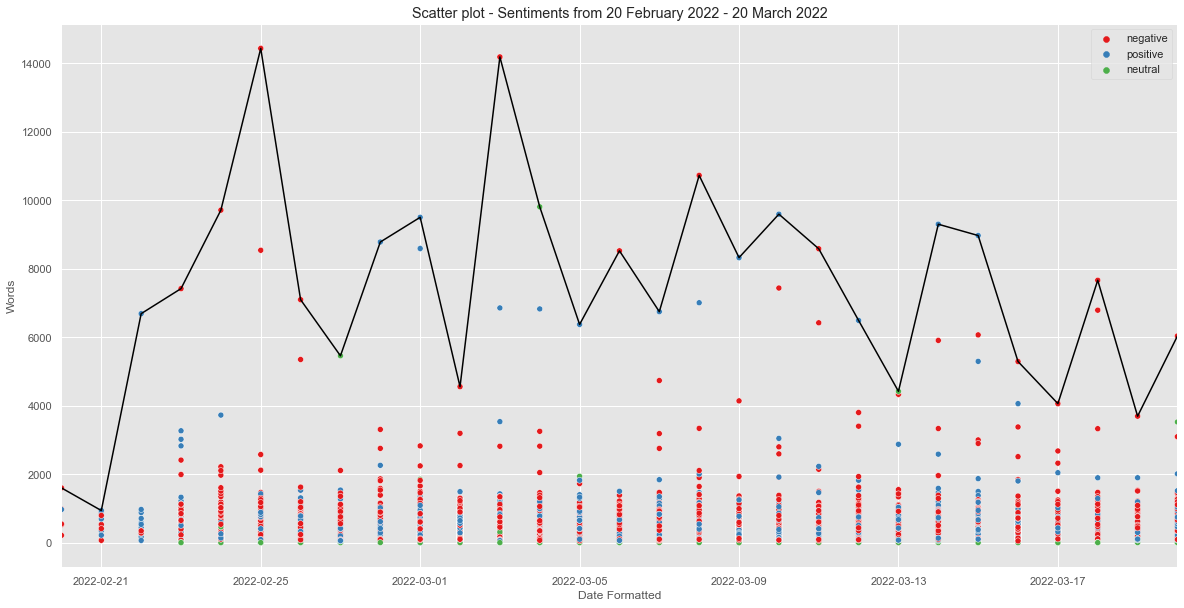

In [366]:
import datetime

fig = plt.figure(figsize=(20, 10))
ax = sns.scatterplot(x='Date Formatted',
                     y='Words',
                     hue='Sentiments',
                     legend='full',
                     data=war_df,
                     palette=sns.color_palette("Set1", n_colors=3))
max_transistors_per_year = war_df.groupby('Date Formatted')['Words'].max()
sns.lineplot(data=max_transistors_per_year,
             ax=ax.axes,
             color='black')
ax.set_xlim(datetime.date(2022, 2,20), datetime.date(2022, 3,20))
ax.set(title= 'Scatter plot - Sentiments from 20 February 2022 - 20 March 2022')
plt.show()

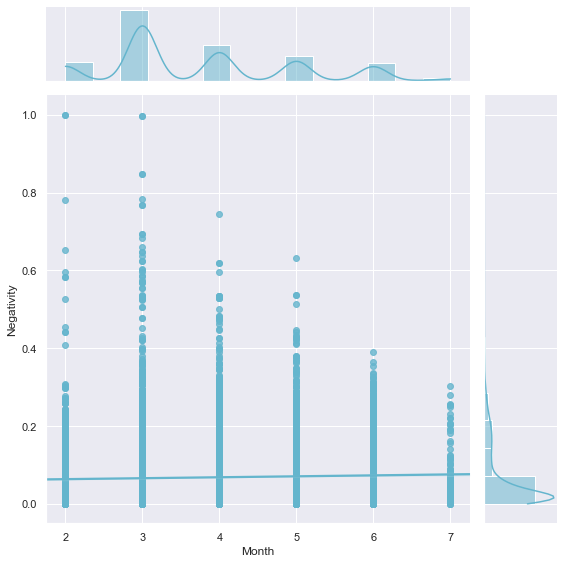

In [219]:
ax = sns.jointplot(x='Month',
                y='Negativity',
                data=war_df[war_df['Date Formatted'] > '2022-02-01'],
                kind="reg",
                truncate=False,
                marginal_kws={'bins': 14},
                color="c",
                height=8,
                   )
plt.show()

/Users/inhalt/PycharmProjects/guardianScraper/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(


(0.0, 0.5)

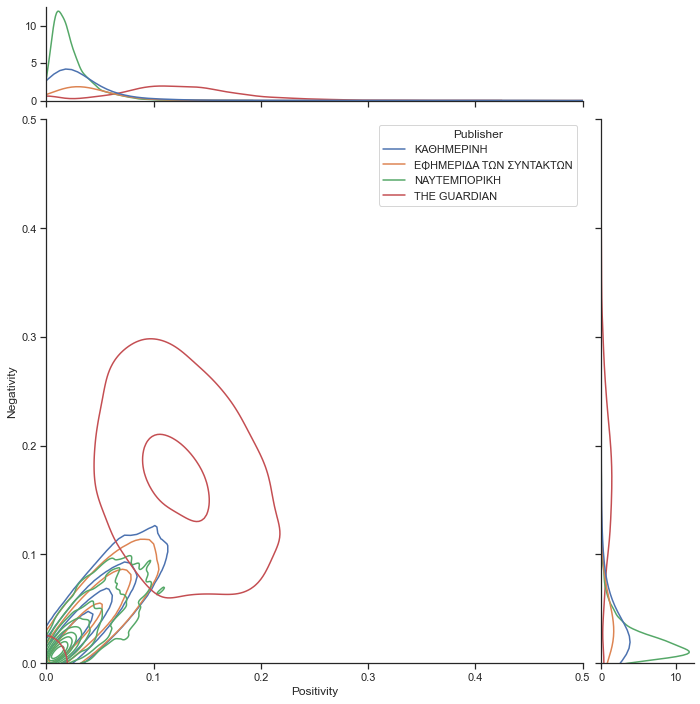

In [373]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-01'],
    x="Positivity",
    y="Negativity",
    hue="Publisher",
    kind="kde",
    height=10,
    aspect=1,
    marginal_ticks=True
)
g.ax_marg_x.set_xlim(0, 0.5)
g.ax_marg_y.set_ylim(0, 0.5)

/Users/inhalt/PycharmProjects/guardianScraper/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(


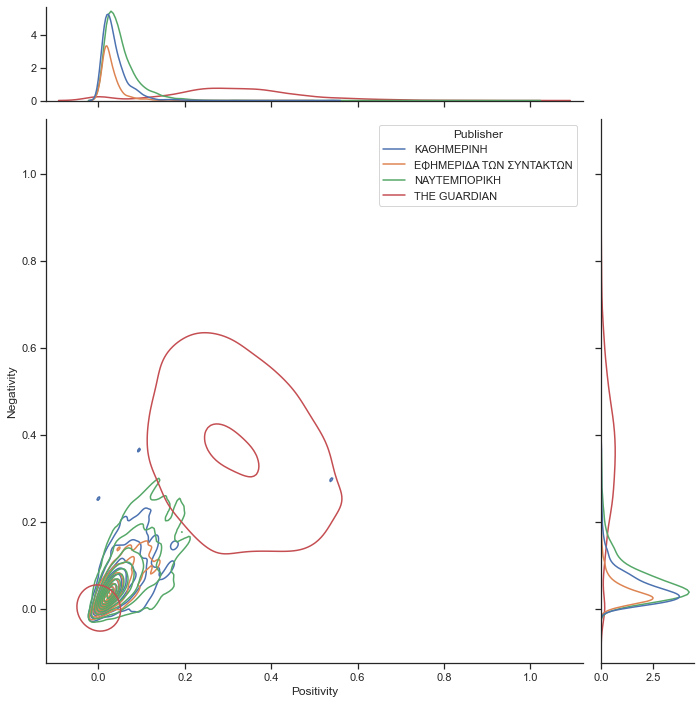

In [10]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-01'],
    x="Positivity",
    y="Negativity",
    hue="Publisher",
    kind="kde",
    height=10,
    aspect=1,
    marginal_ticks=True
)

/Users/inhalt/PycharmProjects/guardianScraper/venv/lib/python3.8/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'aspect'
  cset = contour_func(


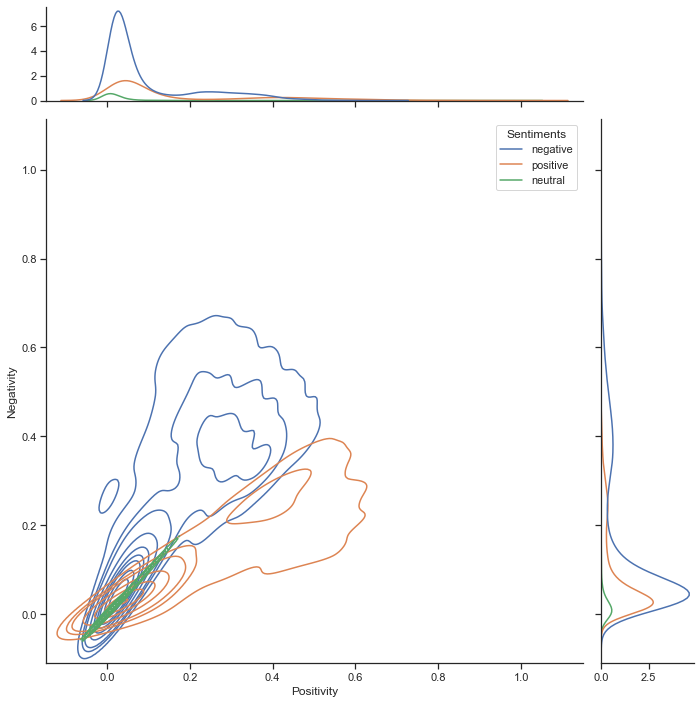

In [12]:
g.ax_marg_y.set_ylim(0, 0.5)
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-01'],
    x="Positivity",
    y="Negativity",
    hue="Sentiments",
    kind="kde",
    height=10,
    aspect=1,
    marginal_ticks=True
)

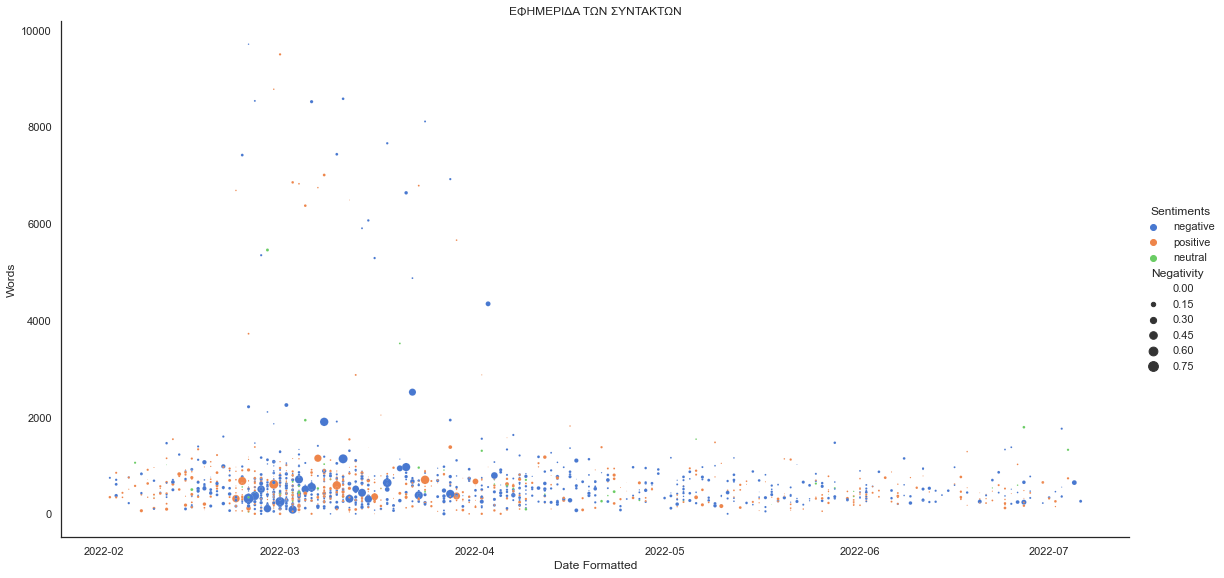

In [127]:
efsyn = sns.relplot(x="Date Formatted",
            y="Words",
            size="Negativity",
            hue='Sentiments',
            sizes=(0, 100),
            height=8,
            aspect=2,
            data=war_df[(war_df['Date Formatted'] > '2022-02-01')
                        & (war_df['Publisher'] == model.Publishers.EFSYN.value)])\
    .set(title= model.Publishers.EFSYN.value)

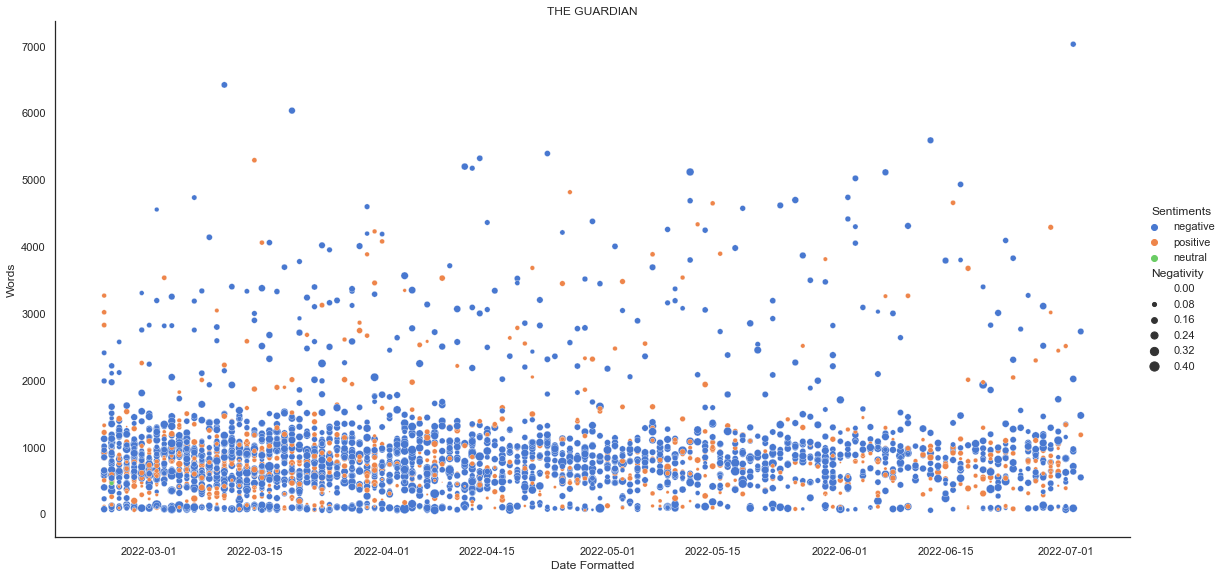

In [128]:
guardian = sns.relplot(x="Date Formatted",
            y="Words",
            size="Negativity",
            hue='Sentiments',
            sizes=(0, 100),
            height=8,
            aspect=2,
            data=war_df[(war_df['Date Formatted'] > '2020-02-01')
                        & (war_df['Publisher'] == model.Publishers.THE_GUARDIAN.value)])\
    .set(title= model.Publishers.THE_GUARDIAN.value)

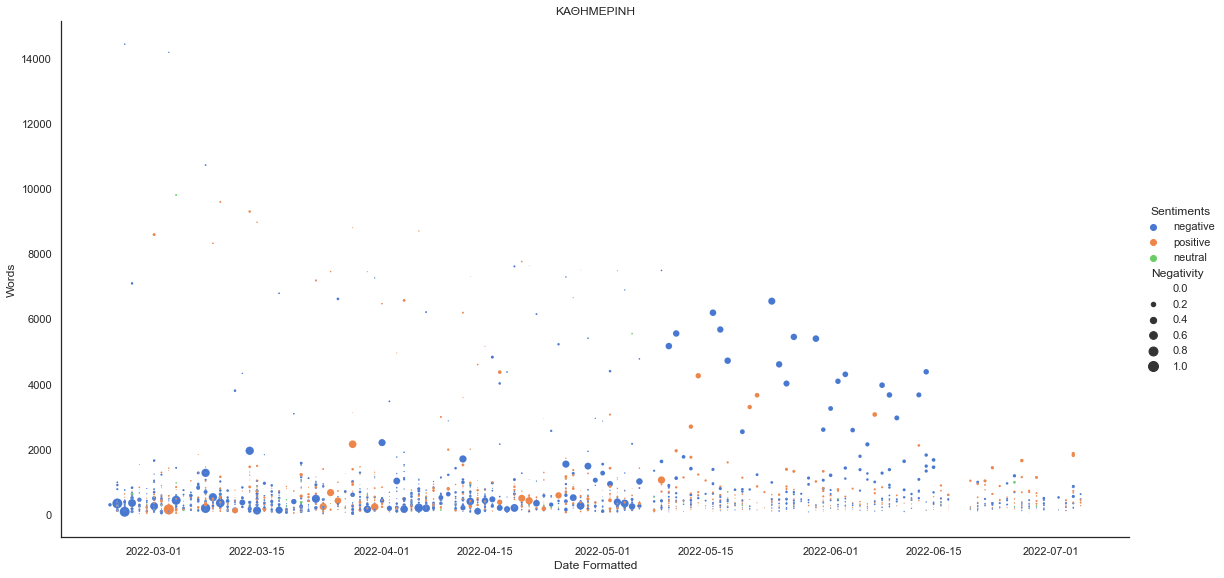

In [129]:
kathimerini = sns.relplot(x="Date Formatted",
            y="Words",
            size="Negativity",
            hue='Sentiments',
            sizes=(0, 100),
            height=8,
            aspect=2,
            data=war_df[(war_df['Date Formatted'] > '2020-02-01')
                        & (war_df['Publisher'] == model.Publishers.KATHIMERINI.value)])\
    .set(title= model.Publishers.KATHIMERINI.value)

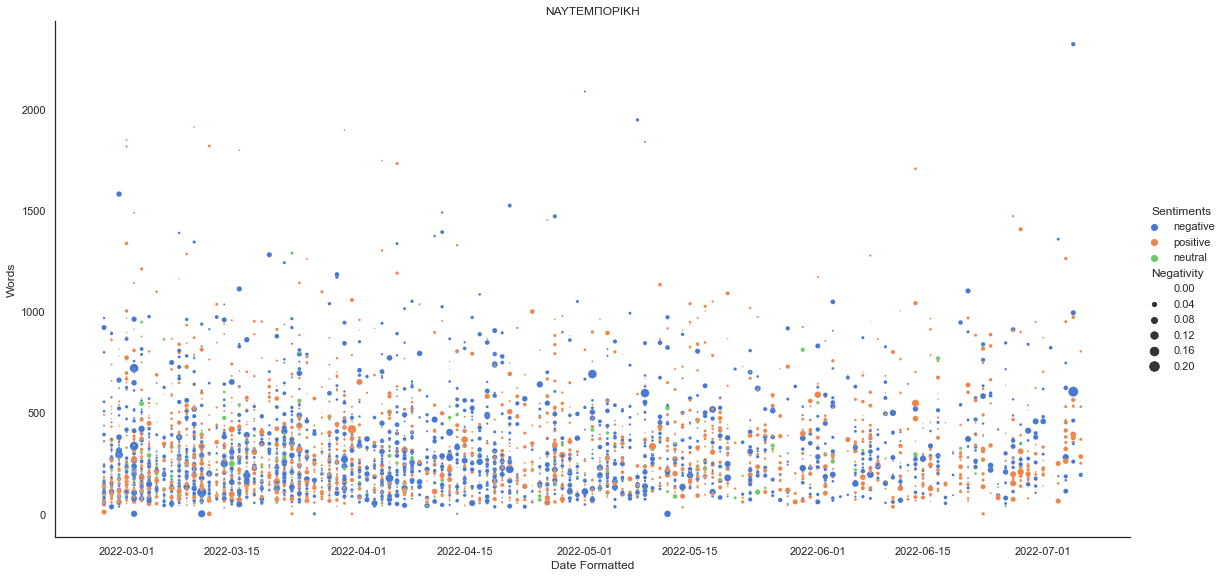

In [130]:
naftemporiki = sns.relplot(
    x="Date Formatted",
    y="Words",
    size="Negativity",
    hue='Sentiments',
    sizes=(0, 100),
    height=8,
    aspect=2,
    data=war_df[(war_df['Date Formatted'] > '2020-02-01')
                        & (war_df['Publisher'] == model.Publishers.NAFTEMPORIKI.value)])\
    .set(title= model.Publishers.NAFTEMPORIKI.value)

<AxesSubplot:>

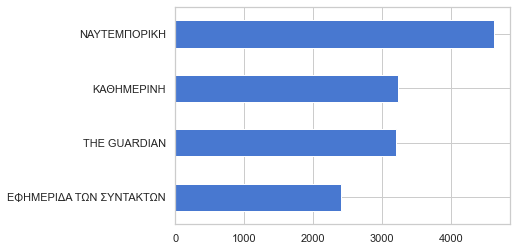

In [134]:
war_df['Publisher'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

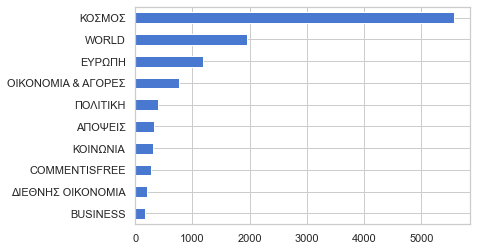

In [133]:
war_df['Tag'].value_counts().head(10).sort_values().plot(kind='barh')

In [186]:
war_df['Tag'].value_counts()

ΚΟΣΜΟΣ                5570
WORLD                 1958
ΕΥΡΩΠΗ                1183
ΟΙΚΟΝΟΜΙΑ & ΑΓΟΡΕΣ     772
ΠΟΛΙΤΙΚΗ               393
Name: Tag, dtype: int64

In [190]:
war_df['Tag'].value_counts().nlargest(4)

ΚΟΣΜΟΣ                5570
WORLD                 1958
ΕΥΡΩΠΗ                1183
ΟΙΚΟΝΟΜΙΑ & ΑΓΟΡΕΣ     772
Name: Tag, dtype: int64

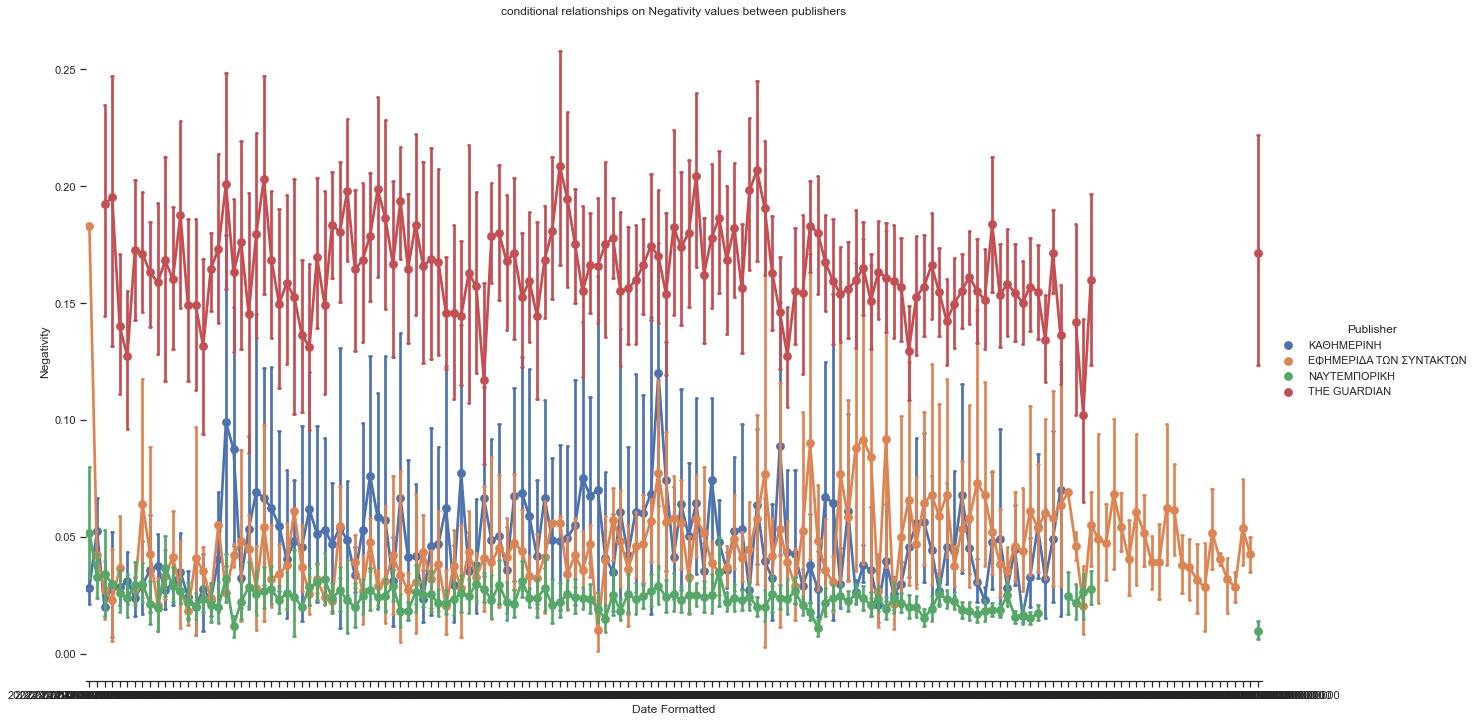

In [380]:
ax = sns.catplot(x="Date Formatted",
                 y="Negativity",
                 hue="Publisher",
                 height=10, aspect=1.8,
                 capsize=.2,
                 kind="point",
                 data=war_df[war_df['Date Formatted'] > '2022-02-01'])
ax.despine(left=True)
ax.set(title= 'conditional relationships on Negativity values between publishers')
plt.show()

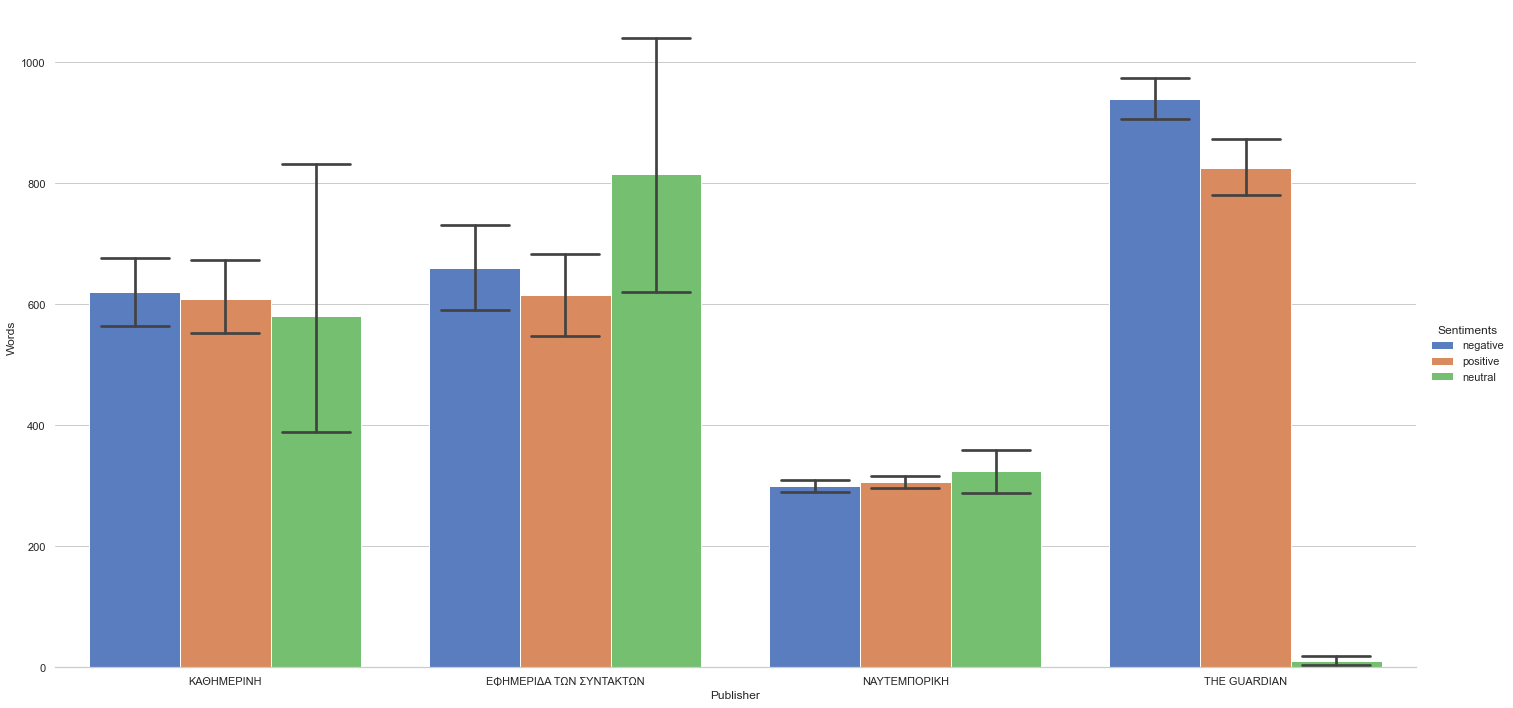

In [170]:
ax = sns.catplot(x="Publisher",
                 y="Words",
                 hue="Sentiments",
                 height=10, aspect=2,
                 capsize=.2,
                 kind="bar",
                 data=war_df[war_df['Date Formatted'] > '2022-02-01'])
ax.despine(left=True)
plt.show()

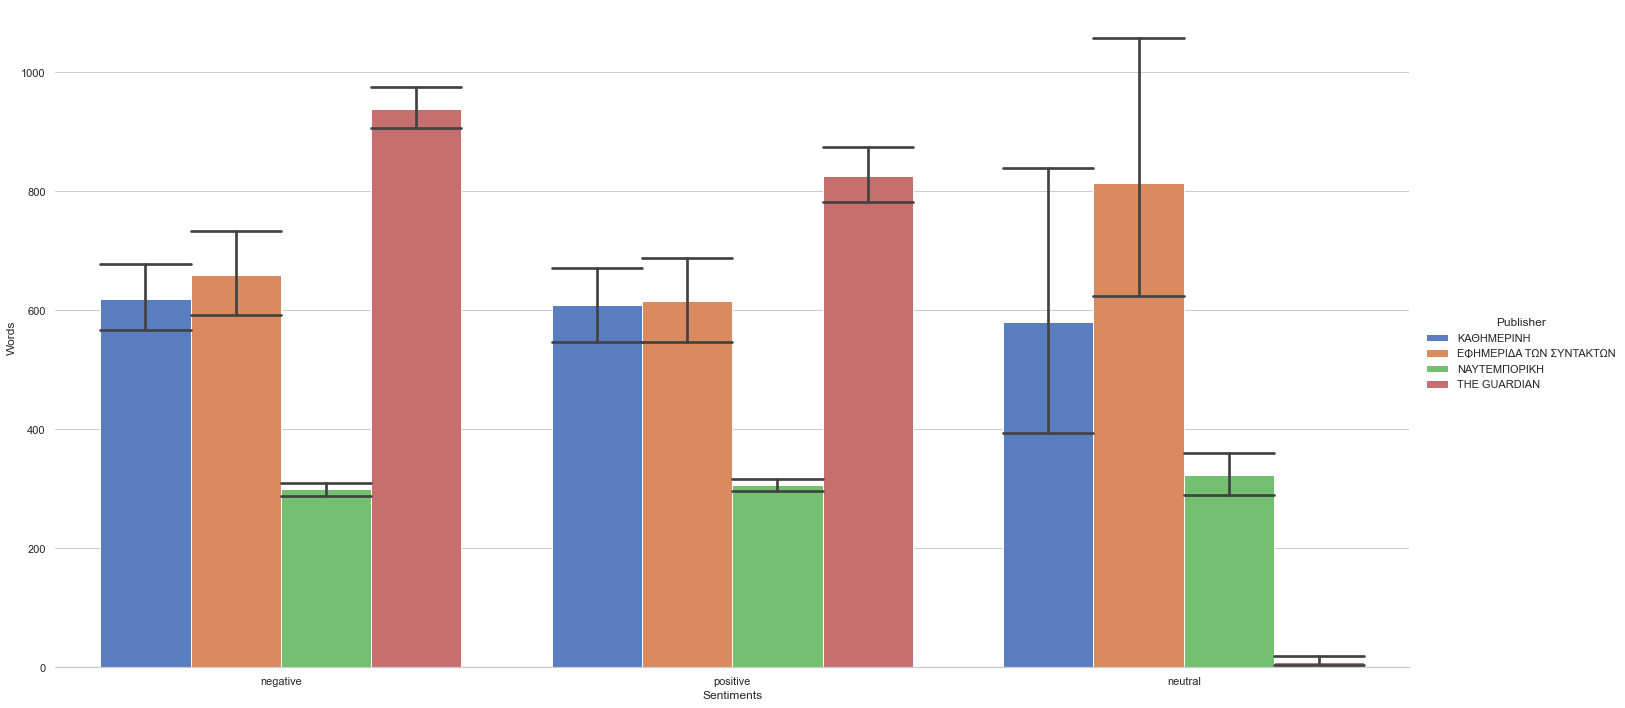

In [181]:
ax = sns.catplot(x="Sentiments",
                 y="Words",
                 hue="Publisher",
                 height=10, aspect=2,
                 capsize=.2,
                 kind="bar",
                 data=war_df[war_df['Date Formatted'] > '2022-02-01'])
ax.despine(left=True)
plt.show()

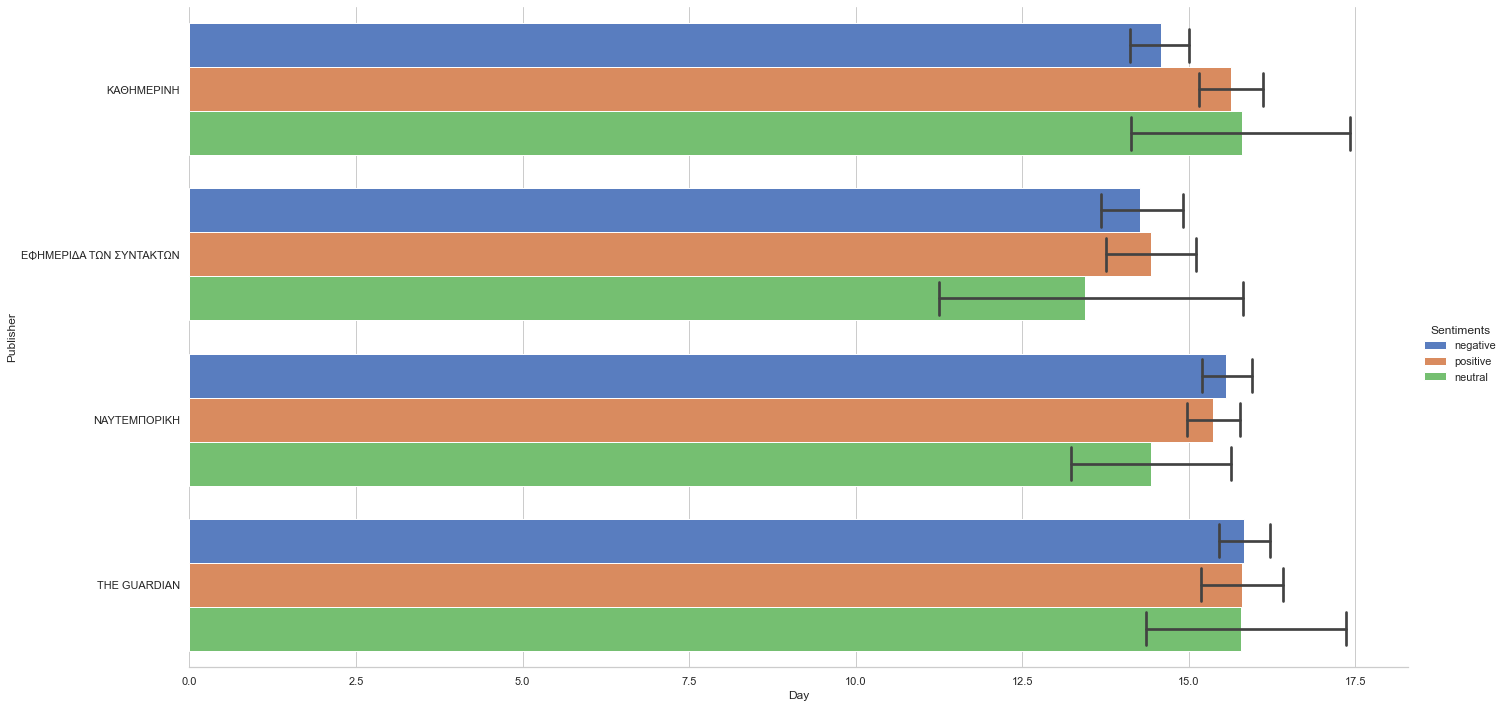

In [174]:
ax = sns.catplot(x="Day",
                 y="Publisher",
                 hue="Sentiments",
                 height=10, aspect=2,
                 capsize=.2,
                 kind="bar",
                 data=war_df[war_df['Date Formatted'] > '2022-02-01'])
ax.despine(left=True)
plt.show()

In [152]:
gkk = war_df.groupby(['Publisher', 'Sentiments'])

# Print the first value in each group
gkk.first()

Date Formatted Lang  \
Publisher               Sentiments                       
ΚΑΘΗΜΕΡΙΝΗ              negative       2022-07-05   el   
                        positive       2022-07-05   el   
                        neutral        2022-06-29   el   
ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ negative       2022-07-06   el   
                        positive       2022-07-04   el   
                        neutral        2022-07-04   el   
ΝΑΥΤΕΜΠΟΡΙΚΗ            negative       2022-07-06   el   
                        positive       2022-07-06   el   
                        neutral        2022-07-01   el   
THE GUARDIAN            negative       2022-02-23   en   
                        positive       2022-02-23   en   
                        neutral        2022-02-23   en   

                                                                              Heading  \
Publisher               Sentiments                                                      
ΚΑΘΗΜΕΡΙΝΗ              negative    Μπορέλ: O Πούτιν πρέπει να επιλέξει «ανάμεσα σ...   
                        positive    Μαριούπολη: Οι φιλορώσοι αυτονομιστές κατέσχεσ...   
                        neutral     Τζόνσον: Αν ο Πούτιν ήταν γυναίκα, δεν θα είχε...   
ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ negative    Πυρά Ζελένσκι κατά Ελλήνων εφοπλιστών για τη μ...   
                        positive                               Καθυστερημένη εκκένωση   
                        neutral       Ποιους βλάπτει η αντίσταση του ουκρανικού λαού;   
ΝΑΥΤΕΜΠΟΡΙΚΗ            negative    Σιτηρά: Η Μόσχα αρνείται το περιστατικό με το ...   
                        positive    Πόλεμος στην Ουκρανία: Τι αποκάλυψε ο «πιο επι...   
                        neutral     Ουκρανία: Η Ρωσία έπληξε με βόμβες φωσφόρου το...   
THE GUARDIAN            negative    From ‘Putin’s chef’ to the RT editor: names ex...   
                        positive    Biden imposes sanctions on company behind Nord...   
                        neutral     Martin Rowson on Russian donors to the Tory pa...   

                                                      Tag  \
Publisher               Sentiments                          
ΚΑΘΗΜΕΡΙΝΗ              negative                   ΚΟΣΜΟΣ   
                        positive    ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ   
                        neutral                    ΚΟΣΜΟΣ   
ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ negative       ΕΞΩΤΕΡΙΚΗ ΠΟΛΙΤΙΚΗ   
                        positive                   ΕΥΡΩΠΗ   
                        neutral                   ΑΠΟΨΕΙΣ   
ΝΑΥΤΕΜΠΟΡΙΚΗ            negative                   ΚΟΣΜΟΣ   
                        positive                   ΚΟΣΜΟΣ   
                        neutral                    ΚΟΣΜΟΣ   
THE GUARDIAN            negative                    WORLD   
                        positive                  US NEWS   
                        neutral             COMMENTISFREE   

                                                                                 Text  \
Publisher               Sentiments                                                      
ΚΑΘΗΜΕΡΙΝΗ              negative    Οι κυρώσεις, που έχουν επιβληθεί στην Ρωσία σε...   
                        positive    Οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...   
                        neutral     Ο Ρώσος πρόεδρος Βλαντίμιρ Πούτιν δεν θα είχε ...   
ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ negative    Επίθεση στην Αθήνα μέσω του συνεδρίου του Econ...   
                        positive    Πολύ νωρίτερα του αναμενόμενου από τους «ανεξά...   
                        neutral     Μα, τι θέλει και αντιστέκεται επιτέλους αυτός ...   
ΝΑΥΤΕΜΠΟΡΙΚΗ            negative    Το ρωσικό υπουργείο Εξωτερικών ανακοίνωσε σήμε...   
                        positive    Πριν από μία εβδομάδα η επικεφαλής των Υπηρεσι...   
                        neutral     Ο ουκρανικός στρατός κατηγόρησε απόψε τους Ρώσ...   
THE GUARDIAN            negative    The EU has approved asset freezes and travel b...   
                        positive    19.07Biden annou

In [115]:
war_df[(war_df['Date Formatted'] > '2020-01-01') & (war_df['Publisher'] == model.Publishers.EFSYN.value)]


,Publisher,Date Formatted,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Lemma,Sentiments,Positivity,Negativity
3233,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2022-07-06,el,Πυρά Ζελένσκι κατά Ελλήνων εφοπλιστών για τη μ...,ΕΞΩΤΕΡΙΚΗ ΠΟΛΙΤΙΚΗ,Επίθεση στην Αθήνα μέσω του συνεδρίου του Econ...,False,0,,,1802,261,2022,7,6,επίθεση Αθήνα συνεδρίου economist κάνω φορά πρ...,negative,0.044,0.069
3234,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2022-07-05,el,"«Πεθαίνουμε σαν τις μύγες, γιατί είμαστε εδώ;»",ΕΥΡΩΠΗ,Η κατάρρευση του ουκρανικού μετώπου στο Ντονμπ...,False,0,,,4404,646,2022,7,5,κατάρρευση ουκρανικός μετώπος ντονμπάς συνεχίζ...,negative,0.110,0.183
3235,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2022-07-04,el,Ποιους βλάπτει η αντίσταση του ουκρανικού λαού;,ΑΠΟΨΕΙΣ,"Μα, τι θέλει και αντιστέκεται επιτέλους αυτός ...",False,0,,,8883,1324,2022,7,4,θέλω αντιστέκω επιτέλους ουκρανικός λαός καθυσ...,neutral,0.042,0.042
3236,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2022-07-04,el,Καθυστερημένη εκκένωση,ΕΥΡΩΠΗ,Πολύ νωρίτερα του αναμενόμενου από τους «ανεξά...,False,0,,,5173,735,2022,7,4,αναμενόμενου ανεξάρτητος δυτικός ορισμένος ρωσ...,positive,0.043,0.042
3237,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2022-07-03,el,Ο πόλεμος στην Ουκρανία και η κομμουνιστική Αρ...,ΝΗΣΙΔΕΣ,Ο πόλεμος στην Ουκρανία έθεσε σε σοβαρή δοκιμα...,False,0,,,12086,1761,2022,7,3,πόλεμος ουκρανία έθεσε σοβαρός δοκιμασία δύναμ...,negative,0.018,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2020-01-11,el,Το Ιράν παραδέχεται ότι κατέρριψε το ουκρανικό...,ΜΕΣΗ ΑΝΑΤΟΛΗ,Ανατροπή στην υπόθεση του ουκρανικού Boeing το...,False,0,,,3111,444,2020,1,11,ανατροπή υπόθεση ουκρανικός boeing συνετρίβη π...,positive,0.037,0.034
5057,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2020-01-10,el,Πλήρη έρευνα για την αεροπορική τραγωδία στο Ι...,ΚΟΣΜΟΣ,Αύριο Σάββατο αναμένονται από το Ιράν οι επίση...,False,0,,,4194,622,2020,1,10,σάββατο αναμένω ιράν επίσημος ανακοινώσεις σχε...,negative,0.033,0.043
5058,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2020-01-09,el,To Boeing προσπάθησε να γυρίσει πίσω αλλά δεν ...,ΜΕΣΗ ΑΝΑΤΟΛΗ,Μετά τις πρώτες έρευνες ο Ιρανικός Οργανισμός ...,False,0,,,5826,864,2020,1,9,έρευνα ιρανικός οργανισμός πολιτικός αεροπορία...,positive,0.028,0.018
5059,ΕΦΗΜΕΡΙΔΑ ΤΩΝ ΣΥΝΤΑΚΤΩΝ,2020-01-08,el,Ουκρανικό Boeing: Δεν βλέπουν κατάρριψη από πύ...,ΜΕΣΗ ΑΝΑΤΟΛΗ,Οι πρώτες εκτιμήσεις για τα αίτια της συντριβή...,False,0,,,3506,505,2020,1,8,εκτίμηση αίτιο συντριβής ουκρανικός boeing λίγ...,positive,0.046,0.031


## Distribution plot

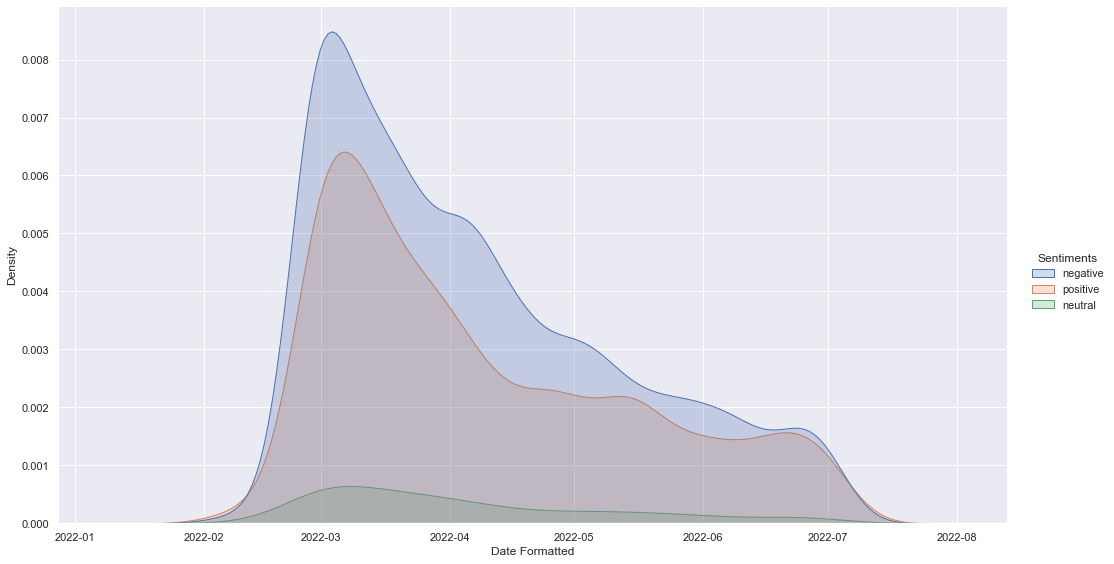

In [382]:
sns.set_theme(style="darkgrid")
ax = sns.displot(war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Sentiments",
            kind="kde",
            fill=True,
            height=8,
            aspect=1.8)

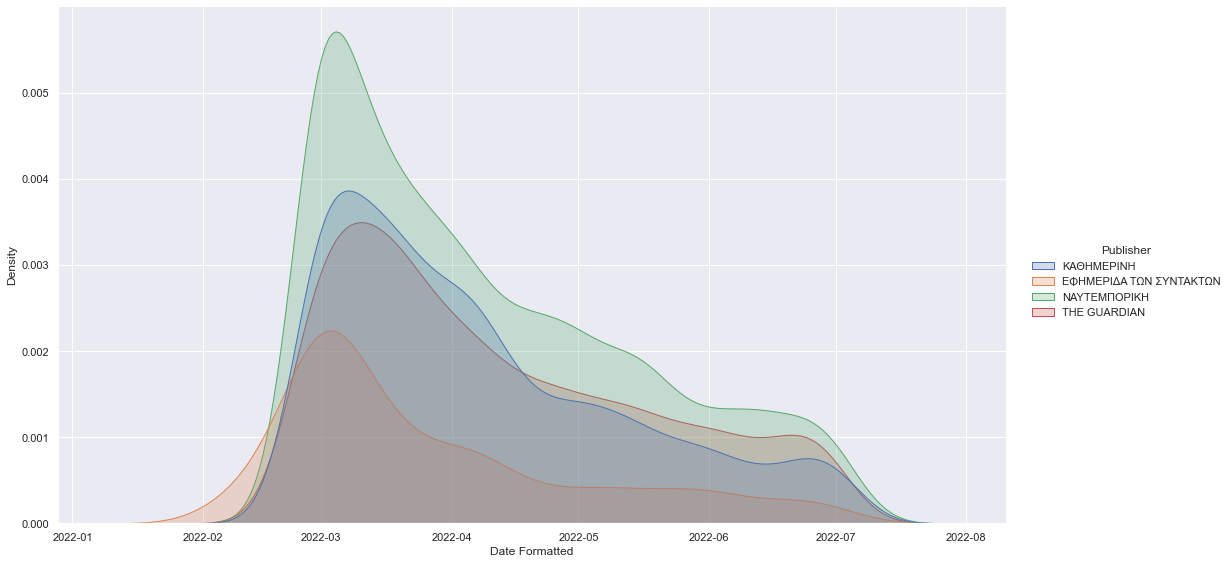

In [385]:
sns.set_theme(style="darkgrid")
ax = sns.displot(war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Publisher",
            kind="kde",
            fill=True,
            height=8,
            aspect=1.8)

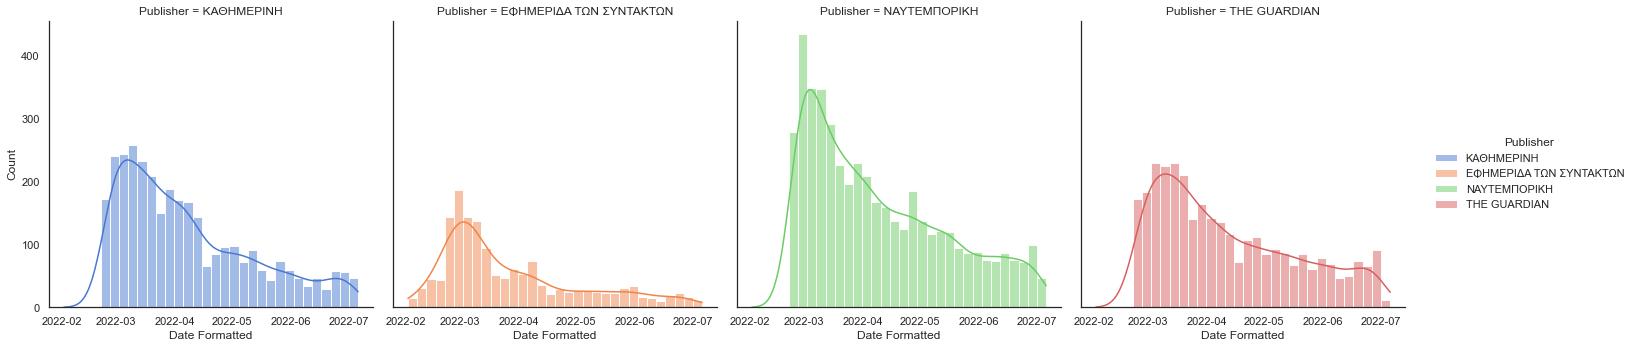

In [386]:
sns.set(style="white",
        palette="muted",
        color_codes=True)
sns.displot(data=war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Publisher",
            col="Publisher",
            kde=True)
plt.show()

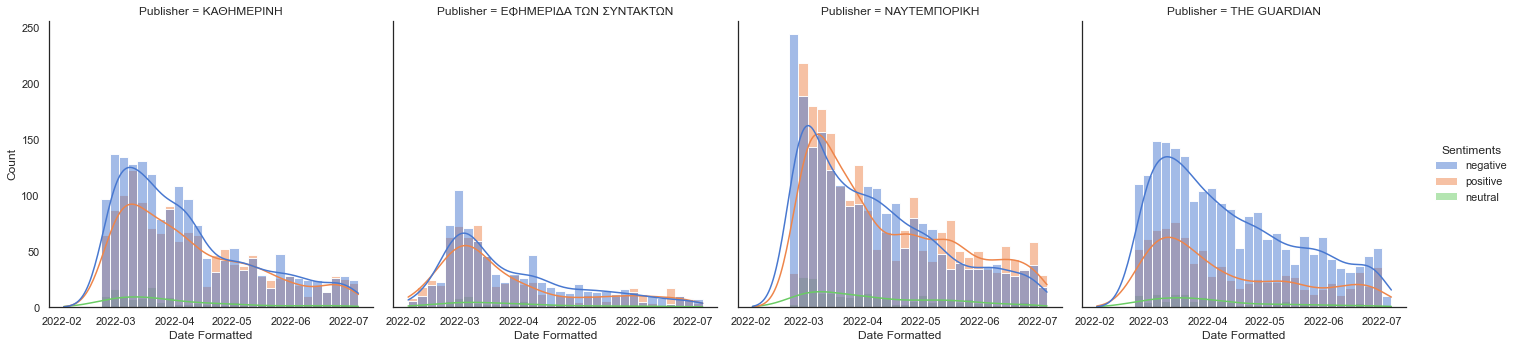

In [387]:
sns.set(style="white",
        palette="muted",
        color_codes=True)
sns.displot(data=war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Sentiments",
            col="Publisher",
            kde=True)
plt.show()

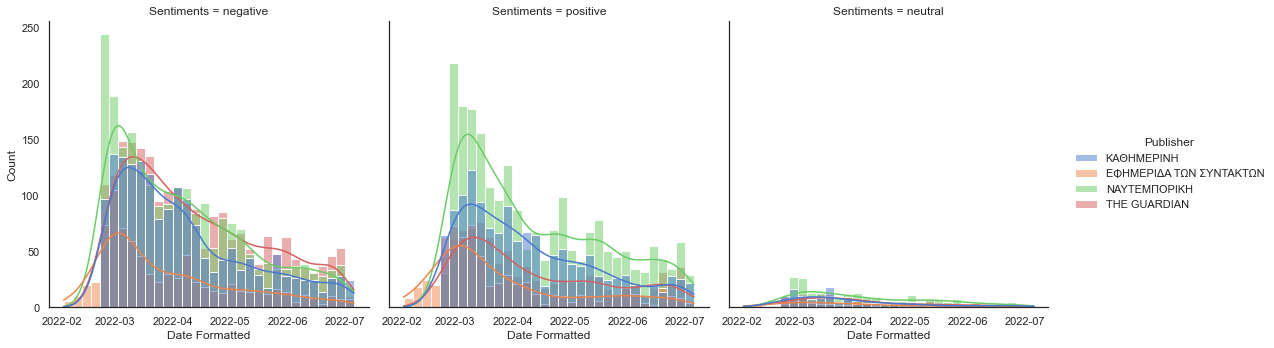

In [388]:
sns.set(style="white",
        palette="muted",
        color_codes=True)
sns.displot(data=war_df[war_df['Date Formatted'] > '2022-02-01'],
            x="Date Formatted",
            hue="Publisher",
            col="Sentiments",
            kde=True)
plt.show()

## Date as index

In [25]:
war_df.set_index('Date Formatted' , inplace=True)

<AxesSubplot:>

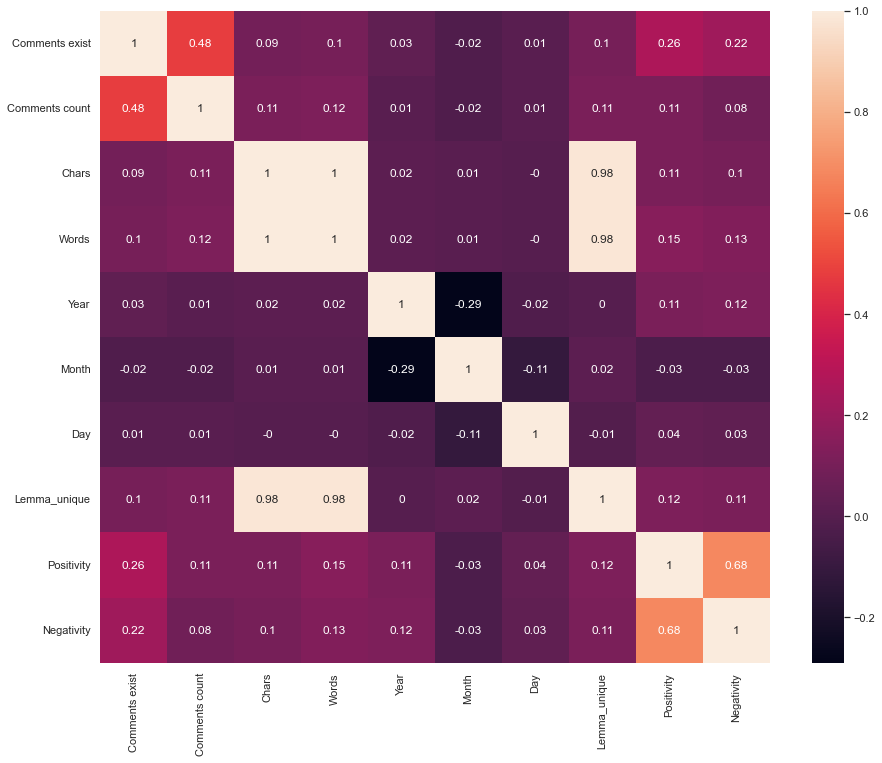

In [30]:
import seaborn as sns

correlation_matrix = war_df.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc = {'figure.figsize':(15, 12)})
sns.heatmap(data=correlation_matrix, annot=True)

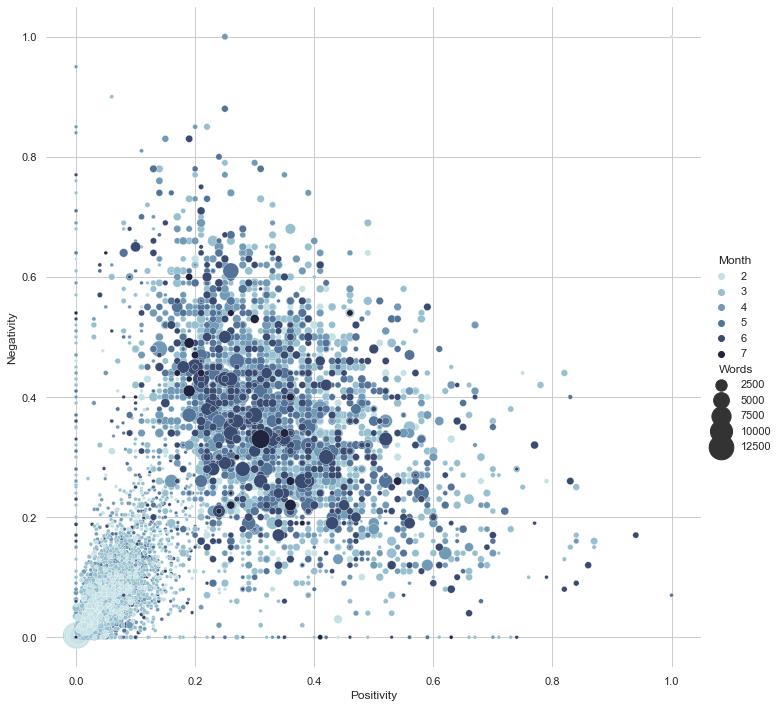

In [52]:
import seaborn as sns
import matplotlib as plt

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=war_df[war_df['Date Formatted'] > '2022-02-01'],
    x="Positivity", y="Negativity",
    hue="Month", size="Words",
    palette=cmap, sizes=(10, 700),  height=10, aspect=1/1
)
g.set(xscale="linear", yscale="linear")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [18]:
war_df.head()

,Publisher,Lang,Heading,Tag,Text,Comments exist,Comments count,Comments api key,Article url,Chars,Words,Year,Month,Day,Lemma,Lemma_unique,Sentiments,Positivity,Negativity
Date Formatted,,,,,,,,,,,,,,,,,,,
2022-07-05,ΚΑΘΗΜΕΡΙΝΗ,el,Μπορέλ: O Πούτιν πρέπει να επιλέξει «ανάμεσα σ...,ΚΟΣΜΟΣ,"Οι κυρώσεις, που έχουν επιβληθεί στην Ρωσία σε...",False,0,NaN,https://www.kathimerini.gr/world/561942142/mpo...,4114,627,2022,7,5,κύρωση επιβάλλω Ρωσία σχέση εισβολή ουκρανία α...,234,negative,0.016,0.022
2022-07-05,ΚΑΘΗΜΕΡΙΝΗ,el,Μαριούπολη: Οι φιλορώσοι αυτονομιστές κατέσχεσ...,ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ,Οι φιλορώσοι αυτονομιστές κατέλαβαν δύο πλοία ...,False,0,NaN,https://www.kathimerini.gr/world/561942133/mar...,2548,360,2022,7,5,φιλορώσος αυτονομιστής κατέλαβαν δύο πλοίο ξέν...,163,negative,0.027,0.030
2022-07-05,ΚΑΘΗΜΕΡΙΝΗ,el,Πρόβλεψη για αύξηση του εμπορίου μεταξύ Ρωσίας...,ΔΙΕΘΝΗΣ ΟΙΚΟΝΟΜΙΑ,Ο εμπορικός τζίρος μεταξύ Τουρκίας και Ρωσίας ...,False,0,NaN,https://www.kathimerini.gr/economy/internation...,1848,274,2022,7,5,εμπορικός τζίρος τουρκία ρωσίας ενδέχεται αυξά...,114,negative,0.041,0.046
2022-07-05,ΚΑΘΗΜΕΡΙΝΗ,el,Σακελλαροπούλου σε Ζελένσκι: Είμαστε και θα εί...,ΠΟΛΙΤΙΚΗ,«Το απαραβίαστο των συνόρων είναι η βάση της σ...,False,0,NaN,https://www.kathimerini.gr/politics/561941488/...,2472,371,2022,7,5,απαραβίαστο συνόρων βάση συμβίωση 1945 δύναμη ...,129,negative,0.050,0.057
2022-07-05,ΚΑΘΗΜΕΡΙΝΗ,el,Ουκρανία: Το ρωσοκρατούμενο πυρηνικό εργοστάσι...,ΚΟΣΜΟΣ,"Ο μεγαλύτερος πυρηνικός σταθμός της Ευρώπης, μ...",False,0,NaN,https://www.kathimerini.gr/world/561941377/oyk...,2829,418,2022,7,5,μεγαλύτερος πυρηνικός σταθμός ευρώπη έδρα ημικ...,139,positive,0.031,0.022


<AxesSubplot:xlabel='Date Formatted'>

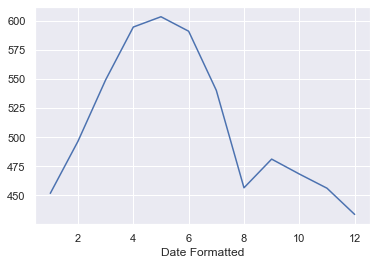

In [221]:
war_df['Words'].groupby(by=war_df.index.month).mean().plot()

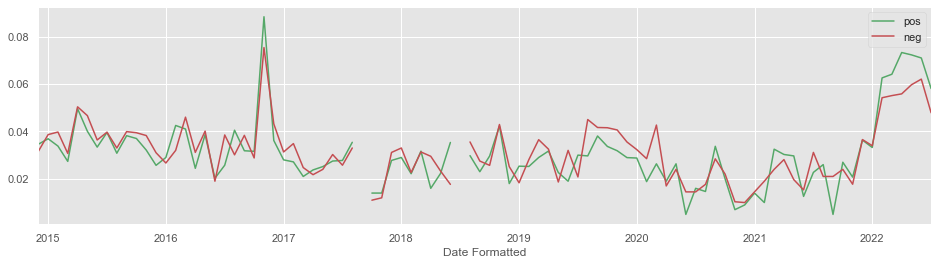

In [225]:
plt.style.use('ggplot')
ax = war_df['Negativity']\
    .resample('M')\
    .mean()\
    .plot(figsize=(16,4),
          color = 'g', label='pos')
war_df['Positivity']\
    .resample('M')\
    .mean()\
    .plot(figsize=(16,4),
          ax = ax,
          label = 'neg', color = 'r').legend()

<AxesSubplot:xlabel='Date Formatted'>

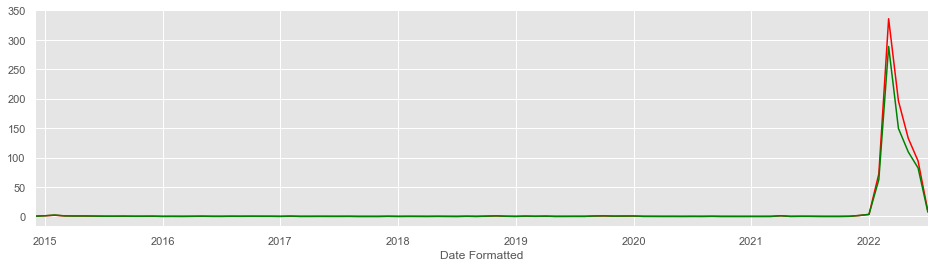

In [227]:
ax = war_df['Negativity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
war_df['Positivity'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

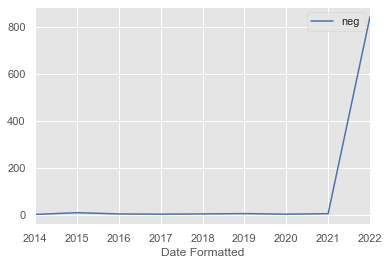

In [230]:
war_df['Negativity'].resample('A').sum().plot(color = 'b',label = 'neg').legend()

In [276]:
import spacy
nlp_en = spacy.load("en_core_web_md")
nlp_el = spacy.load("el_core_news_md")

In [321]:
english_text = war_df[war_df['Lang'] == 'en']['Text'][9:10].str.cat(sep = '')
greek_text = war_df[war_df['Lang'] == 'el']['Heading'][700:701].str.cat(sep = '')

In [322]:
greek_text

'Παιχνίδια πυρηνικού πολέμου στη Βαλτική'

In [334]:
from pathlib import Path
from spacy import displacy

doc1 = nlp_en('Putin’s looming threat gives Johnson some breathing space')
doc2 = nlp_en('Biden imposes sanctions on company behind Nord Stream 2 gas pipeline – as it happened')
doc3 = nlp_en('Understanding Putin’s narrative about Ukraine is the master key to this crisis')
text = nlp_en('With his incursion into Donetsk and Luhansk, Vladimir Putin has broken international law and destroyed the best negotiating track, the Minsk agreement. That is clear. What is also clear is why he did it. An increasing number of politicians and media analysts claim Putin may be mentally unstable, or that he is isolated in a bubble of yes-men who don’t warn him of dangers ahead. Many commentators say he is trying to restore the Soviet Union or recreate a Russian sphere of influence on his country’s borders, and that this week’s intrusion into eastern Ukraine is the first step towards an all-out attack on Kyiv to topple its government and even move against the Baltic states. None of these assertions is necessarily true. THE GUARDIAN')
# displacy.render(doc, style="ent")
html = displacy.render([doc1, doc2, doc3, text], style="ent", page=True, jupyter=True)

TypeError: write() argument must be str, not None

In [331]:
from spacy import displacy

doc1 = nlp_el('Ουκρανία: Βομβαρδισμός από αέρος της Οδησσού, έξι τραυματίες')
doc2 = nlp_el('Οξύνεται η σύγκρουση Ε.Ε.-Ρωσίας: Η Πράγα κατηγορεί τη Μόσχα για οικονομικό πόλεμο')
doc3 = nlp_el('Πολεμικά πλοία των ΗΠΑ στη Βαλτική για τα στρατιωτικά γυμνάσια BALTOPS')
doc4 = nlp_el('Πουτίν: Καλεί επιχειρήσεις και τράπεζες στην... ')
text = nlp_el('Καμία χώρα δεν πρέπει να βασίζεται στον ένα ή τον άλλο φίλο για να την υπερασπιστεί σε μια περίοδο κρίσης, ακόμα κι αν πρόκειται μόνο για αποτροπή», λέει στην «Κ» ο πρέσβης του Ισραήλ Γιόσι Αμράνι λίγο πριν ολοκληρώσει τη θητεία του στην Αθήνα. Ο κ. Αμράνι επισημαίνει τη στρατηγική σημασία της Ελλάδας, ωστόσο υπογραμμίζει ότι «καμία χώρα δεν πρέπει να αναθέτει σε άλλους την ασφάλειά της». Αναφορικά με τον EastMed σημειώνει ότι δεν υπάρχουν ακόμα δέκα χρόνια συζήτησης, ενώ προσθέτει ότι η λύση της εξαγωγής των κοιτασμάτων φυσικού αερίου στην Ανατολική Μεσόγειο πρέπει να περιλαμβάνει όσο περισσότερους παίκτες γίνεται. Μάλιστα εκτιμά ότι η εξομάλυνση των σχέσεων Ισραήλ – Τουρκίας θα αποβεί επωφελής και για τα ελληνοτουρκικά. – Επειτα από τρία χρόνια στην Ελλάδα αποχωρείτε. ΚΑΘΗΜΕΡΙΝΗ')
# displacy.render(doc, style="ent")
html = displacy.render([doc1, doc2, doc3,doc4, text], style="ent", page=True)

In [390]:
doc = nlp_el('Οξύνεται η σύγκρουση Ε.Ε.- Ρωσίας: Η Πράγα κατηγορεί τη Μόσχα για οικονομικό πόλεμο')
html = displacy.render(doc, style="dep",
                       minify=True,
                       jupyter=True,
                       options={'distance': 120,
                                'bg': '#2B2B2B',
                                'collapse_phrases': True,
                                'color': '#fff'})

In [401]:
import scattertext as st

corpus = st.CorpusFromPandas(war_df[war_df['Lang'] == 'en'][:200],
                             category_col='Sentiments',
                             text_col='Lemma',
                             nlp=nlp_en).build()
html = st.produce_scattertext_explorer(corpus,
                                       category="positive",
                                       category_name="positive",
                                       not_category_name="negative",
                                       width_in_pixels=1000)
open("../docs/Sentiment-Visualization-200.html", 'wb').write(html.encode('utf-8'))

1503170